In [153]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [154]:
img_base = mpimg.imread("Cameraman_gs.png")
interp_fac = 8
img_base = img_base*0.0 #these two lines replace the original image with a point source to study the effects of interpolation
img_base[256,256] = 1.0

imdim_orig = img_base.shape[0] # Assumes a square image

img_original_fft = np.fft.fftshift(np.fft.fft2(img_base)) #FFTshift required to bring the DC level to the centre - makes zero padding easier
img_original = np.fft.ifft2(img_original_fft) #"Reconstruct" the original image

img_interp_fft = np.zeros([imdim_orig*interp_fac,imdim_orig*interp_fac], dtype=np.complex128) #Array to hold the zero padded FFT

cent_negdim = int((interp_fac-1)*imdim_orig/2) # Finding the left/top coordinate of the centre square in the Fourier plane
cent_posdim = int((interp_fac+1)*imdim_orig/2) # Finding the right/bottom coordinate of the centre square in the Fourier plane

img_interp_fft[cent_negdim:cent_posdim, cent_negdim:cent_posdim] += img_original_fft #Zero padded !
img_interp = np.fft.ifft2(img_interp_fft)

Text(0.5, 1.0, 'Interpolated image with 4096 size')

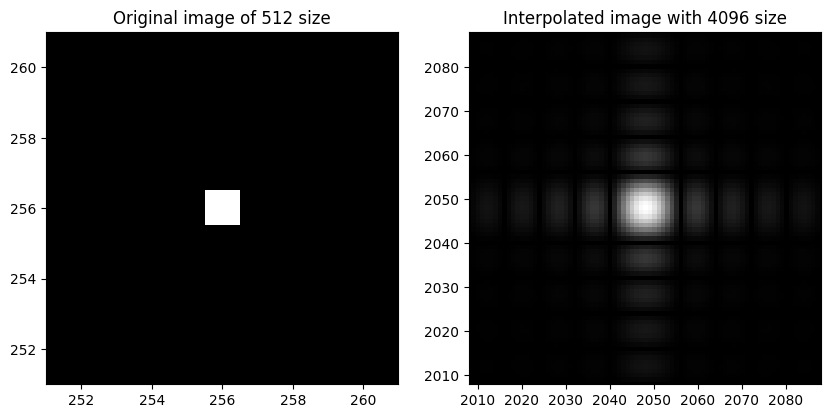

In [155]:
fig, ax = plt.subplots(1,2, figsize=(5*2,11*2))
ax[0].imshow(np.abs(img_original), cmap='gray')
ax[0].set_xlim(251,261)
ax[0].set_ylim(251,261)

ax[0].set_title("Original image of "+str(imdim_orig)+" size")
ax[1].imshow(np.abs(img_interp), cmap='gray')
ax[1].set_xlim(251*interp_fac,261*interp_fac)
ax[1].set_ylim(251*interp_fac,261*interp_fac)
ax[1].set_title("Interpolated image with "+str(imdim_orig*interp_fac)+" size")

In [156]:
# plt.figure(figsize=(5,5))
# plt.imshow(np.log(np.abs(img_original_fft)))

# plt.figure(figsize=(5,5))
# plt.imshow(np.log(np.abs(img_interp_fft)))